In [1]:
import numpy as np
from data3 import data,x,y,z
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from pyowl import OwlRegressor
from mpl_toolkits.mplot3d import Axes3D
from laplace import get_laplace, knn_laplace,extend_knn,cordinate
from kMeans import kMeans, min_k_index, max_k_index
import copy

In [2]:
def store(coef,B,index):
    n=len(coef)
    if index == 0:
        for i in range(n):
            B[i+1,index]=coef[i]
    elif index==n:
        for i in range(n):
            B[i,index]=coef[i]
    else:
        for i in range(index):
            B[i,index]=coef[i]
        for i in range(index,n):
            B[i+1,index]=coef[i]
    return B

In [3]:
def reshapeL(l):
    n=len(l)
    m=len(l[0])
    L=[]
    for i in range(m):
        x=[]
        for j in range(n):
            x.append(X[j][i])
        L.append(x)
    return L

In [4]:
def get_B(data,indexs,B,alpha,beta):
    n_sample=len(data[0])
    n_feature=len(data)
    for index in indexs:
        X=np.zeros((n_sample,n_feature-1))
        if index == 0:
            for i in range(n_feature-1):
                X[:,i]=data[i+1]
        elif index == n_feature-1:
            for i in range(n_feature-1):
                X[:,i]=data[i]
        else:
            for i in range(index):
                X[:,i]=data[i]
            for i in range(index,n_feature-1):
                X[:,i]=data[i+1]
        Y=np.array(data[index])
        #oscar_owl = OwlRegressor(weights=np.ones(n_feature-1) * alpha)
        #oscar_owl.fit(X,Y)
        #B=store(oscar_owl.coef_,B,index)
        oscar_owl = OwlRegressor(weights=(alpha,beta))
        oscar_owl.fit(X,Y)
        B=store(oscar_owl.coef_,B,index)
        #lasso=Lasso(alpha,max_iter=10000)
        #lasso.fit(X,Y)
        #B=store(lasso.coef_,B,index)
    return B

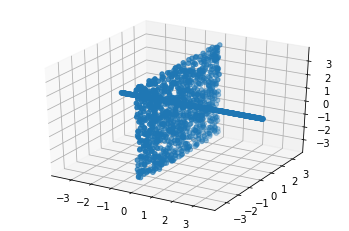

In [5]:
ax=plt.subplot(111,projection='3d')
ax.scatter(x,y,z)

In [6]:
n_sample=len(data[0])
n_feature=len(data)

In [7]:
alpha=0.01
beta=0.001
k=500

In [8]:
indexs=np.random.choice(range(n_feature),k)
B=np.zeros((n_feature,n_feature))

In [9]:
B=get_B(data,indexs,B,alpha,beta)
B=np.abs(B)
W=B+B.T

In [14]:
nonzero=[]
for index in range(100):
    nonzero.append(np.count_nonzero(B[:,index]))
nonzero_idx=[]
for i in range(100):
    if nonzero[i]!=0:
        nonzero_idx.append(i)


In [15]:
index=nonzero_idx[6]
n=10
idx=[]
for i in range(1,n):
    idx.append(max_k_index(B[:,index],i))
s=0
for i in idx:
    if i>100:
        s=s+1


IndexError: list index out of range

NameError: name 'idx' is not defined

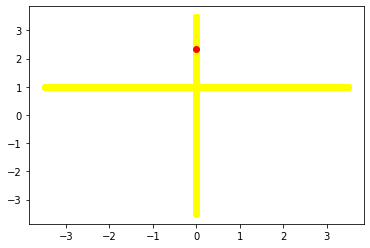

In [16]:
ax=plt.subplot(111)
ax.scatter(x,y,color='yellow')
ax.scatter(x[index],y[index],color='red')
ax.scatter(x[idx[0]],y[idx[0]],color='midnightblue')
ax.scatter(x[idx[1]],y[idx[1]],color='blue')
ax.scatter(x[idx[2]],y[idx[2]],color='mediumslateblue')
ax.scatter(x[idx[3]],y[idx[3]],color='dodgerblue')
ax.scatter(x[idx[4]],y[idx[4]],color='deepskyblue')
ax.scatter(x[idx[5]],y[idx[5]],color='lightskyblue')
ax.scatter(x[idx[6]],y[idx[6]],color='powderblue')

In [10]:
L=get_laplace(W)

In [11]:
u,v=np.linalg.eig(L)
v=np.real(v)
u=np.real(u)

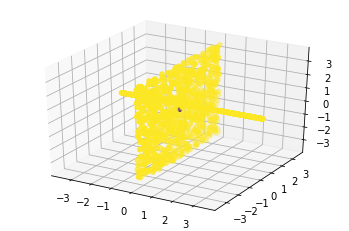

In [12]:
ax = plt.subplot(111,projection='3d')
ax.scatter(x,y,z,c=v[:,min_k_index(u,2)])